Importing Dependenies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Importing Models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Load dataset

In [8]:
data = pd.read_csv('/content/heart_disease_data.csv')

In [9]:
#top 5 recods
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# shape of data
data.shape

(303, 14)

In [11]:
#check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#check target categorical values
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --------------> Defective Heart

0 --------------> healthy Heart

In [13]:
# statistical measures
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# check correlation
correlation = data.corr()

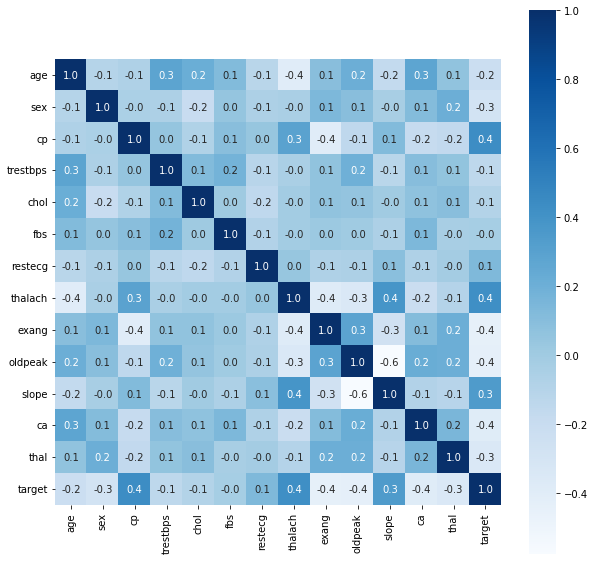

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


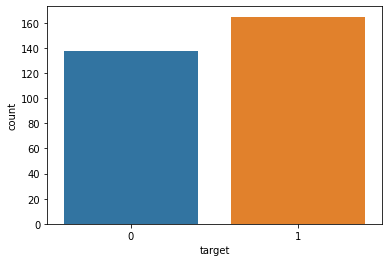

In [18]:
sns.countplot(data.target, data=data)

In [21]:
# separate the X and Y
X = data.drop(columns=['target'],axis=1)
Y = data['target']

In [22]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

Model Selection

In [33]:
# cross validation 
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [35]:
def cross_validation():

  for model in models:

    cross_val = cross_val_score(model,X,Y,cv=5)

    cross_val_score_mean = sum(cross_val)/len(cross_val)

    cross_val_score_pct = cross_val_score_mean*100

    cv_accuracy = round(cross_val_score_pct,2)

    print('accuracy_score',model,' :', cv_accuracy)
cvs=cross_validation()
print(cvs)

accuracy_score LogisticRegression(max_iter=1000)  : 83.15
accuracy_score SVC(kernel='linear')  : 82.83
accuracy_score KNeighborsClassifier()  : 64.39
accuracy_score RandomForestClassifier(random_state=0)  : 83.81
None


accuracy_score LogisticRegression(max_iter=1000)  : 83.15

accuracy_score SVC(kernel='linear')  : 82.83

accuracy_score KNeighborsClassifier()  : 64.39

accuracy_score RandomForestClassifier
(random_state=0)  : 83.81

RandomForestClassifier have high accuracy score

In [68]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [69]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [70]:
type(model_hyperparameters)

dict

In [71]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [72]:
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [73]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [74]:
model_keys[0]

'log_reg_hyperparameters'

In [75]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

Applying GridSearchCV



In [76]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [77]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.831585,{'C': 5}
1,SVC(),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),0.838087,{'n_estimators': 100}
